<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a00351269/blob/main/Actividad_Semanal--7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [279]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


# to make this notebook's output stable across runs
np.random.seed(42)

In [7]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [8]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

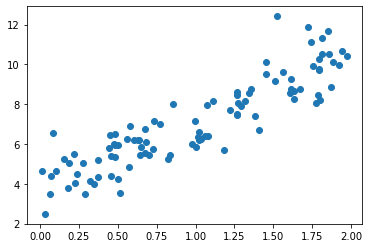

In [9]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [10]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [14]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

In [15]:
linear_reg.coef_, linear_reg.intercept_


(array([[3.36555744]]), array([3.74406122]))

Plot the model's predictions:

In [12]:
#X_fit[]

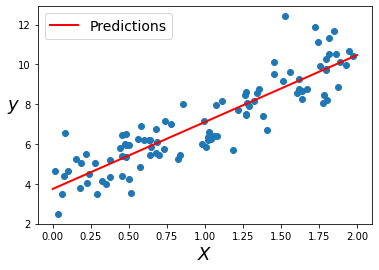

In [16]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [17]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [18]:
X_new.shape

(2, 1)

In [19]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [20]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [14]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [185]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

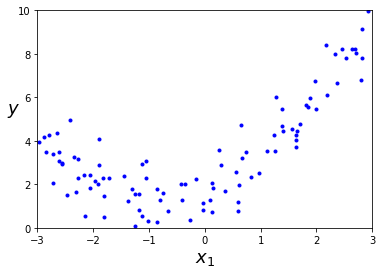

In [186]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [187]:
import pandas as pd
pd.DataFrame(y)

,0
0,1.617611
1,8.061859
2,4.452506
3,0.779585
4,1.846257
...,...
95,1.147656
96,2.068597
97,2.000904
98,3.483292


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [188]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [189]:
X_poly

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

`X_poly` now contains the original feature of X plus the square of the feature:

In [190]:
print(X[0])
print(X[0]*X[0])


[-0.75275929]
[0.56664654]


In [191]:
X_poly[0]

array([-0.75275929,  0.56664654])

Fit the model to this extended training data:

In [192]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.93366893, 0.56456263]]), array([1.78134581]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

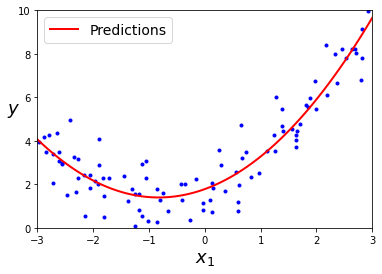

In [193]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)




#Ejercicio 1. Costo en la industria de manufactura. 
##Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.


###1.- Divide los datos del costo de manufactura. 

###Utiliza la función train_test_split (viene el ejemplo al final del notebook)

2.- Regresion Lineal.

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


3.- Regresión Polinomial.

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.


4.- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


5.- Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

6.- Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?





In [194]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')# leemos a un dataframe la informacion
df.sample(10)

,Number of Units,Manufacturing Cost
680,5.083549,38.094090
648,4.992818,33.948027
394,4.119537,56.980989
931,6.476508,30.222178
497,4.433310,29.824991
462,4.306285,41.262662
735,5.283807,28.928129
81,2.649751,52.882813
43,2.151590,52.029263
128,2.998296,42.393697


In [195]:
df.describe()#la informacion estadistica resumida de cada columna

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [196]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

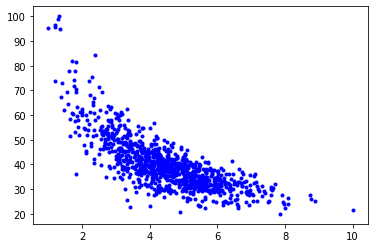

In [198]:
plt.plot(X,y,'b.')#vemos el grafico de los datos X,y

1.- Realizamos la particion :

In [248]:
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=0.20,random_state=0)


In [249]:
print(Xtv.shape, Xtest.shape, ytv.shape, ytest.shape)

(800, 1) (200, 1) (800,) (200,)


###2.- Regresion Lineal.

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [250]:
modelo = LinearRegression(fit_intercept=True)
modelo.fit(Xtv, ytv)

LinearRegression()

Estos son los coeficientes y el intercept:

In [251]:
print("Model slope:    ", modelo.coef_[0])
print("Model intercept:", modelo.intercept_)

Model slope:     -6.123962526222854
Model intercept: 67.51699929483895



La ecuacion del modelo queda asi:


$\hat{y} =  -6.124X +67.517$

Así veamos la visualizacion:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


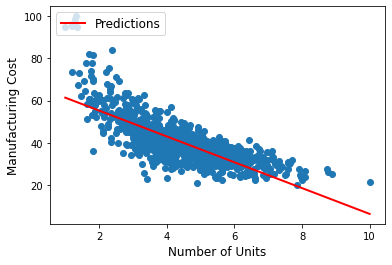

In [252]:
X_fit = np.linspace(1, 10, 100)
y_fit = modelo.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel('Number of Units', fontsize=12)
plt.ylabel('Manufacturing Cost', fontsize=12)
plt.legend(loc="upper left", fontsize=12);

Ahora obtenemos la siguientes metricas:

In [253]:
y_pred=modelo.predict(Xtest)

In [254]:
resultados={}
resultados['lineal']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [255]:
print('   Error Medio Absoluto (MAE):', resultados['lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['lineal'][1])
print('                     r2_score:',resultados ['lineal'][2])

   Error Medio Absoluto (MAE): 4.8901661963170975
Root Mean Squared Error(RMSE): 7.023460530219433
                     r2_score: 0.5526895076238993


##3.- Regresión Polinomial.

Realiza la regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [256]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)

In [257]:
modelo.fit(X_poly, ytv)


LinearRegression()

In [258]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [-17.35377809   1.24345115]
Model intercept: 90.69281709517362



La ecuacion queda:

$\hat{y} =  -17.35X +1.24X^2 + 90.69$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


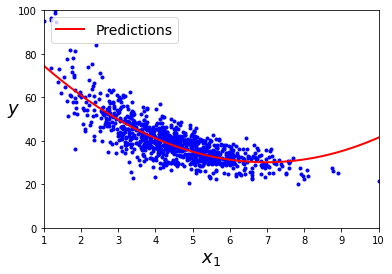

In [259]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = modelo.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 0, 100]);

In [260]:
X_polytest = poly_features.fit_transform(Xtest)
y_pred=modelo.predict(X_polytest)


In [261]:
resultados['polinomial']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [262]:
print('   Error Medio Absoluto (MAE):', resultados['polinomial'][0])
print('Root Mean Squared Error(RMSE):', resultados['polinomial'][1])
print('                     r2_score:',resultados ['polinomial'][2])

   Error Medio Absoluto (MAE): 4.499477736770161
Root Mean Squared Error(RMSE): 6.14594886001069
                     r2_score: 0.657480992082238


##4.- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.



In [287]:
modelo = Ridge(alpha=1)
modelo.fit(Xtv, ytv)

Ridge(alpha=1)

In [288]:
modelo.coef_, modelo.intercept_

(array([-6.1195816]), 67.49755921641744)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


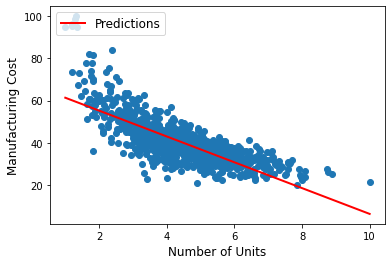

In [289]:
X_fit = np.linspace(1, 10, 100)
y_fit = modelo.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel('Number of Units', fontsize=12)
plt.ylabel('Manufacturing Cost', fontsize=12)
plt.legend(loc="upper left", fontsize=12);

In [291]:
y_pred=modelo.predict(Xtest)

In [292]:
resultados['Ridge']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [293]:
print('   Error Medio Absoluto (MAE):', resultados['Ridge'][0])
print('Root Mean Squared Error(RMSE):', resultados['Ridge'][1])
print('                     r2_score:',resultados ['Ridge'][2])

   Error Medio Absoluto (MAE): 4.888986436763052
Root Mean Squared Error(RMSE): 7.022967198991941
                     r2_score: 0.5527523440229261


Ahora con Ridge polinomio grado 2:

In [337]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)

In [348]:
modelo = Ridge(alpha=10)
modelo.fit(X_poly, ytv)


Ridge(alpha=10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


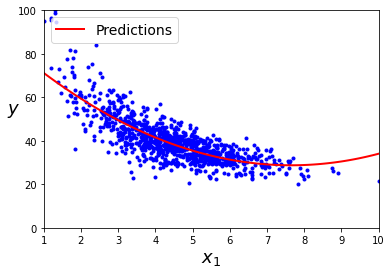

In [349]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = modelo.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 0, 100]);

In [350]:
X_polytest = poly_features.fit_transform(Xtest)
y_pred=modelo.predict(X_polytest)


In [351]:
resultados['Ridge polinomial']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [352]:
print('   Error Medio Absoluto (MAE):', resultados['Ridge polinomial'][0])
print('Root Mean Squared Error(RMSE):', resultados['Ridge polinomial'][1])
print('                     r2_score:',resultados ['Ridge polinomial'][2])

   Error Medio Absoluto (MAE): 4.409342255329253
Root Mean Squared Error(RMSE): 6.113000427338259
                     r2_score: 0.661143636871347


In [353]:
resultados

{'lineal': [4.8901661963170975, 7.023460530219433, 0.5526895076238993],
 'polinomial': [4.499477736770161, 6.14594886001069, 0.657480992082238],
 'Ridge': [4.888986436763052, 7.022967198991941, 0.5527523440229261],
 'Ridge polinomial': [4.409342255329253, 6.113000427338259, 0.661143636871347]}

Ahora con Lasso:


In [360]:
modelo = Lasso(alpha=0.01)
modelo.fit(Xtv, ytv)



Lasso(alpha=0.01)

In [361]:
modelo.coef_, modelo.intercept_

(array([-6.11823544]), 67.49158569020855)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


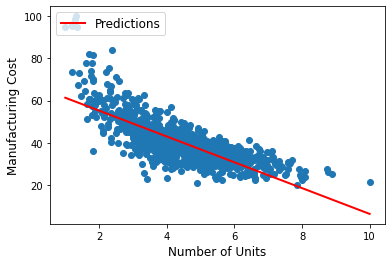

In [362]:
X_fit = np.linspace(1, 10, 100)
y_fit = modelo.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel('Number of Units', fontsize=12)
plt.ylabel('Manufacturing Cost', fontsize=12)
plt.legend(loc="upper left", fontsize=12);

In [363]:
y_pred=modelo.predict(Xtest)

In [364]:
resultados['Lasso Lineal']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [365]:
print('   Error Medio Absoluto (MAE):', resultados['Lasso Lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['Lasso Lineal'][1])
print('                     r2_score:',resultados ['Lasso Lineal'][2])

   Error Medio Absoluto (MAE): 4.88862392152708
Root Mean Squared Error(RMSE): 7.022816666977871
                     r2_score: 0.552771516650963


#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
#tu codigo aquí